# A Simple Scaling Relation 

In this test we consider an ensemble of galaxies with observed stellar and (somehow) dark halo masses, which we assume (correctly) to be related by a simple scaling relation, with intrinsic scatter. We wish to learn the parameters of the population. Here is the model:

In [9]:
!pip install daft

  Running setup.py bdist_wheel for daft ... - \ | done
  Stored in directory: /Users/pjm/Library/Caches/pip/wheels/f6/07/60/c453b4057408675a003ccd02455825be6489a79dd4d505b78f
Successfully built daft
You are using pip version 8.0.3, however version 8.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [20]:
# %load Simple_Mstar_Mh_PGM.py
import daft


def simple_Mstar_Mh_PGM():

    # Instantiate a PGM.
    pgm = daft.PGM([3.3, 3.0], origin=[0.3, 0.3], grid_unit=2.6, node_unit=1.3, observed_style="inner")

    # Hyper-parameters.
    pgm.add_node(daft.Node("hyperMh", r"$\mu^{\rm h}$", 1.0, 2.8))
    pgm.add_node(daft.Node("hyperMstar", r"$\mu^{\rm *}$", 1.0, 1.8))

    # Latent variables:
    pgm.add_node(daft.Node("Mh", r"$M^{\rm h}_k$", 1.7, 2.8))
    pgm.add_node(daft.Node("Mstar", r"$M^{\rm *}_k$", 1.7, 1.8))

    # Data:
    pgm.add_node(daft.Node("observedMh", r"$M^{\rm h}_{k,\rm obs}$", 2.4, 2.8))
    pgm.add_node(daft.Node("observedMstar", r"$M^{\rm *}_{k,\rm obs}$", 2.4, 1.8))

    # Constant observational uncertainty:
    pgm.add_node(daft.Node("obssigmaMh", r"\sigma^{\rm h}_{\rm obs}$", 2.8, 2.8, fixed=True))
    pgm.add_node(daft.Node("obssigmaMstar", r"\sigma^{\rm *}_{\rm obs}$", 2.8, 1.8, fixed=True))

    # Add in the edges.
    pgm.add_edge("hyperMh", "Mh")
    pgm.add_edge("hyperMstar", "Mstar")
    pgm.add_edge("Mh", "Mstar")
    pgm.add_edge("Mh", "observedMh")
    pgm.add_edge("Mstar", "observedMstar")
    pgm.add_edge("obssigmaMh", "observedMh")
    pgm.add_edge("obssigmaMstar", "observedMstar")

    # And a plate for the galaxies
    pgm.add_plate(daft.Plate([0.5, 0.7, 2.7, 1.7], label=r"galaxies $k$", shift=-0.1))

    # Render and save.
    pgm.render()
    pgm.figure.savefig("Simple_Mstar_Mh_PGM.png", dpi=300)

    return


In [21]:
simple_Mstar_Mh_PGM()

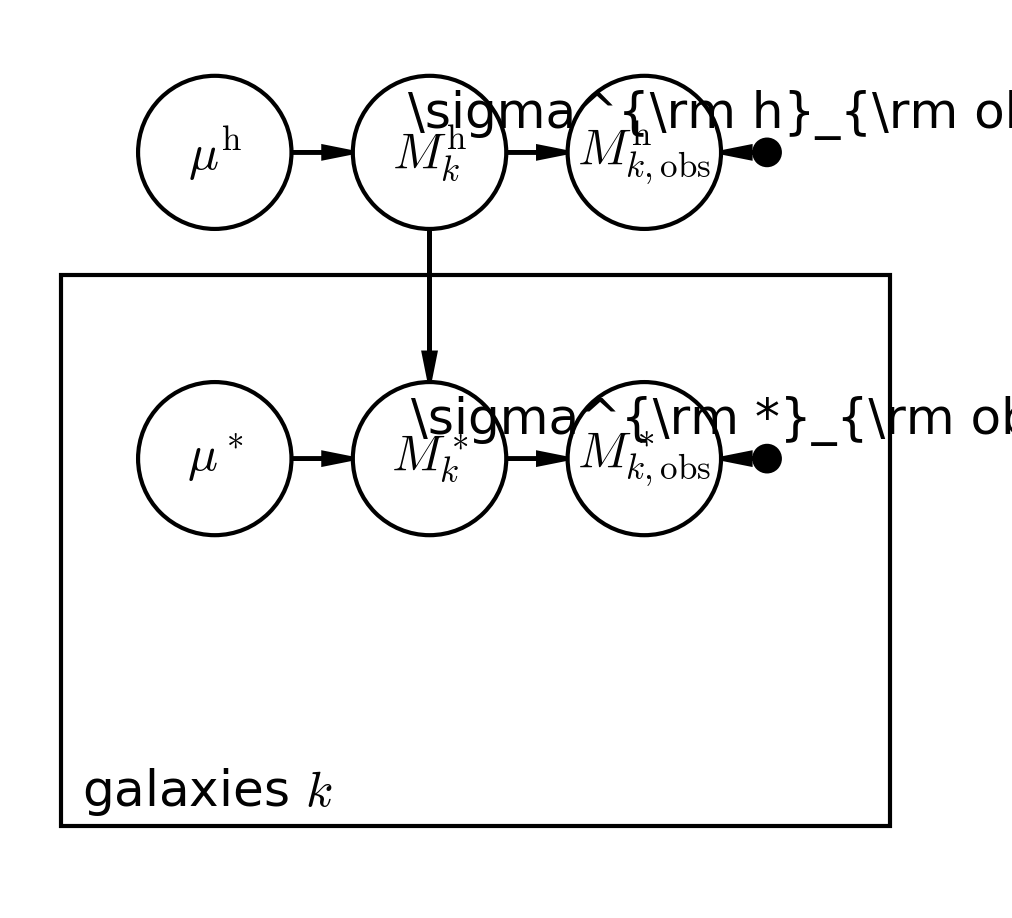

In [22]:
from IPython.display import Image
Image(filename="simple_Mstar_Mh_PGM.png")